In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines.plotting import plot_lifetimes  # Lifeline package for the Survival Analysis
from lifelines import KaplanMeierFitter
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings

import dataframe_image as dfi

warnings.filterwarnings('ignore')  # don't print out warnings

pd.options.display.max_rows = None
pd.options.display.max_columns = 100
# plt.style.use('fivethirtyeight')
# plt.style.use('plot_style.txt')
sns.set(rc = {'figure.figsize':(15,8)})

In [442]:
path_to_data = r"C:\Users\Glodaris\Downloads\data.csv"
##  create a dataframe
df = pd.read_csv(path_to_data, na_values=['(NA)']).fillna(0)


In [443]:
df['Revision all cause'].value_counts()

0    160
1     59
Name: Revision all cause, dtype: int64

In [444]:
df.head()

,Time Years,F/U Status,Gn,Age,BMI,Reoperations,Reason Fail,Revision all cause,FU (y),ROM,∆ROM,KSPain,∆KSP,KSTotal,∆KST,KSFnc,∆KSF,XR FU (y)
0,2.10,failed,F,54.50,33.30,revision UKA to TKA 5/15/2007,aseptic loosening,1,5.50,125,5.00,20,20.00,70,21.00,55,5.00,3.00
1,2.00,failed,F,55.60,28.00,Arthroscopy 12/13/2005; revision UKA to TKA 3/...,aseptic loosening,1,15.20,100,-10.00,45,35.00,90,35.00,60,-10.00,11.30
2,1.30,failed,F,41.60,40.90,revision 9/11/07,aseptic loosening,1,15.00,135,20.00,45,0.00,95,22.00,100,60.00,13.30
3,2.40,failed,F,43.70,32.00,revision UKA to TKA 8/19/2008,medial tibial overload,1,10.20,105,-5.00,50,50.00,94,67.00,40,5.00,2.50
4,9.60,failed,F,55.80,28.30,revision UKA to TKA 12/2/2015,tibial collapse,1,15.40,120,0.00,45,35.00,94,55.00,80,10.00,11.70


In [445]:
def revision(bools):
    ''' Takes in Boolean class, returns credit default name'''
    if bools == 0:
        return 'Success'
    else:
        return 'Failed'

In [446]:
df.head()

,Time Years,F/U Status,Gn,Age,BMI,Reoperations,Reason Fail,Revision all cause,FU (y),ROM,∆ROM,KSPain,∆KSP,KSTotal,∆KST,KSFnc,∆KSF,XR FU (y)
0,2.10,failed,F,54.50,33.30,revision UKA to TKA 5/15/2007,aseptic loosening,1,5.50,125,5.00,20,20.00,70,21.00,55,5.00,3.00
1,2.00,failed,F,55.60,28.00,Arthroscopy 12/13/2005; revision UKA to TKA 3/...,aseptic loosening,1,15.20,100,-10.00,45,35.00,90,35.00,60,-10.00,11.30
2,1.30,failed,F,41.60,40.90,revision 9/11/07,aseptic loosening,1,15.00,135,20.00,45,0.00,95,22.00,100,60.00,13.30
3,2.40,failed,F,43.70,32.00,revision UKA to TKA 8/19/2008,medial tibial overload,1,10.20,105,-5.00,50,50.00,94,67.00,40,5.00,2.50
4,9.60,failed,F,55.80,28.30,revision UKA to TKA 12/2/2015,tibial collapse,1,15.40,120,0.00,45,35.00,94,55.00,80,10.00,11.70


In [447]:
# import pandas as pd
# import dataframe_image as dfi
 
# df = pd.DataFrame({'A': [1,2,3,4],
#                    'B':['A','B','C','D']})
 
# dfi.export(df.head(), 'dataframe.png')


## 1. Percentage breakdown of revision and why it was performed.

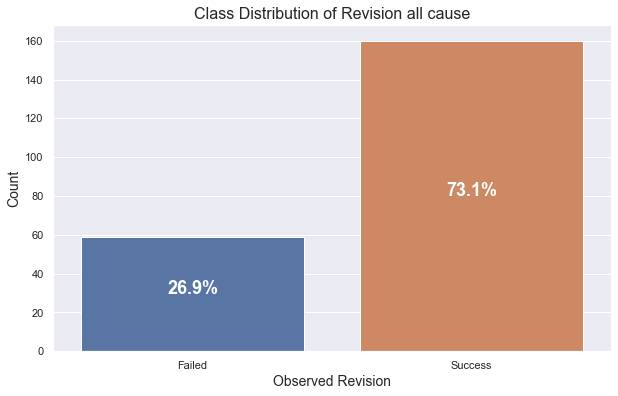

In [448]:
# Apply our loan function
df2 = df.copy(deep=True)
df2['TARGET'] = df2['Revision all cause'].apply(revision)

#set plotting figure
fig = plt.figure(figsize = (10, 6))
#plot a count plot of the target variable
axis = sns.countplot(x = 'TARGET', data = df2);
#set title
axis.set_title('Class Distribution of Revision all cause', size = 16);
#iterate through the count plot
for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(df2)*100, 1)}%", 
            ha = 'center', size = 18, rotation = 0, weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Observed Revision', size = 14) 
axis.set_ylabel('Count', size = 14);

In [449]:
count = df2.groupby('Reason Fail')['TARGET'].count()#.apply(lambda x: x*100/x.sum())

In [450]:
revision_df = pd.DataFrame()

In [451]:
revision_df['Count'] = count
revision_df['Percentage']=pd.DataFrame(count).apply(lambda x:x*100/len(df))

In [452]:
revision_df.reset_index(inplace=True)

In [453]:
revision_df.rename(columns={'Reason Fail': 'Reason for Revision'},inplace=True)

In [454]:

# cm = sns.light_palette("orange", as_cmap=True)
 
# # Visualizing the DataFrame with set precision
# revision_df.style.background_gradient(cmap=cm).set_precision(2)
revision_df

,Reason for Revision,Count,Percentage
0,0,160,73.06
1,arthritic progression,20,9.13
2,aseptic loosening,20,9.13
3,bearing dislocation,3,1.37
4,infection,1,0.46
5,instability,1,0.46
6,intractable pain,2,0.91
7,medial tibial overload,2,0.91
8,poly damage dt loose cement foreign body,1,0.46
9,tibial collapse,6,2.74


In [455]:
dfi.export(revision_df, 'Reason for Revision Percentage Count Table.png')

In [456]:

# ax = revision_df[['Count','Percentage']].plot(
#     kind='bar', rot=0,
#     title='Percentage of Good Answers',
#     ylim=[0, 100],
#     label='Percent Good',
#     legend = 'Reason for Revision',
# )
# # Add Labels on Top of Bars
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f%%')

# plt.show()

## 2.Percentage breakdown of revision and why it was performed.

### Multivariate Analysis

While our Analysis on Survivorship revolves on the entire dataset, it important to note that our primary focus will be on the listed variable in the  dataset.


In this  studies, typical research questions include:

(1) What is the impact of certain clinical characteristics on patient’s survival? For example, is there any difference between the group of people who has higher BMI and those who don’t?

(2) What is the probability that an individual survives a specific period (years, months, days)? For example, given a set of  patients, we will be able to tell that if 200(random number) days after the diagnosis has been passed, then the probability of that person being alive at that time will be 0.7 (random number).

(3) Are there differences in survival between groups of patients? 



#### Multivariate analyses on survivorship
1. **Age**

    i Separate on greater than 65
    ii Separate on less than 65
    
2. **BMI**

    i  Separate on less than 40
    
    ii Separate on greater than 40
    
    
3. **Gender**

   i Men 
   
   ii Women


We can answer the below questions by analysing the **variables(Age, BMI, Gender)** as listed above.

**(1)**  We can find the number of days until patients showed symptoms of failure.

**(2)** We can find the age group with highest level of failure.

**(3)** We can find which Reoperations has the highest survival probability.

**(4)** We can find whether a person’s sex has a significant effect on their survival time?

**(5)** We can also find the median number of days of survival for patients.



We are going to perform a thorough analysis of patients.

### Calculating Summary Statistics for Multivariate Data

It gives us some statistical information like the total number of rows, mean, standard deviation, minimum value, 25th percentile, 50th percentile, 75th percentile, and maximum value for each column in our dataset.

In [457]:
dmap = {'M':1, 'F': 0}
df['Gender'] = df['Gn'].map(dmap)
# multi_df = df[['Age', 'BMI','Gender', 'Revision all cause']]
# multi_df.describe()
# multi_df.describe().style.background_gradient(cmap=cm).set_precision(2)
df.describe()

,Time Years,Age,BMI,Revision all cause,FU (y),ROM,∆ROM,KSPain,∆KSP,KSTotal,∆KST,KSFnc,∆KSF,XR FU (y),Gender
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,13.10,60.46,32.47,0.27,14.75,118.13,1.69,41.02,29.47,86.20,39.11,73.84,18.23,8.13,0.40
std,4.72,8.79,6.34,0.44,2.58,10.41,11.44,14.71,16.80,16.90,23.91,26.62,27.44,5.07,0.49
min,0.20,41.60,19.70,0.00,0.60,80.00,-40.00,0.00,-30.00,43.00,-32.00,0.00,-90.00,0.10,0.00
25%,14.35,54.40,28.00,0.00,14.90,115.00,-5.00,30.00,20.00,75.50,22.50,57.50,0.00,3.10,0.00
50%,15.00,59.50,31.20,0.00,15.30,120.00,0.00,50.00,30.00,95.00,42.00,70.00,20.00,9.00,0.00
75%,15.70,66.60,35.55,1.00,15.80,125.00,10.00,50.00,40.00,99.00,56.00,100.00,40.00,12.45,1.00
max,17.10,86.30,57.70,1.00,17.10,145.00,30.00,78.00,50.00,100.00,85.00,100.00,100.00,16.10,1.00


In [458]:
# dfi.export(df.describe(), 'Summary Statistics for Multivariate Data.png')

### Calculating Correlations for Multivariate Data

It is often of interest to investigate whether any of the variables in a multivariate data set are significantly correlated.

In [459]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [460]:
mosthighlycorrelated(df,100)

,FirstVariable,SecondVariable,Correlation
0,KSPain,∆KSP,0.85
1,KSPain,KSTotal,0.84
2,KSFnc,∆KSF,0.84
3,Time Years,Revision all cause,-0.82
4,ROM,∆ROM,0.74
5,∆KSP,KSTotal,0.71
6,∆KSP,∆KST,0.69
7,KSTotal,∆KST,0.67
8,Time Years,FU (y),0.64
9,KSPain,∆KST,0.57


In [461]:

# dfi.export(mosthighlycorrelated(df,100), 'Summary Statistics for Multivariate Data.png')

Let's take a deeper drive into  our dataset to understand some of the underlying relationships based on some certain conditions

### Kaplan-Meier Estimator with groups

Let’s divide our data into 2 groups: **Gender** (Male and Female), **Age** (>65 and <65) and BMI(>40 and < 40). Our goal here is to check is there any significant difference in survival rate if we divide our data set based on sex, Age, and BMI .

* Gender

*  Age Greater and less than 65

* BMI Greater and less than 40

#### Gender

In [462]:
# kmf_m is for male dataset.
# kmf_f is for female dataset.
kmf_m = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()

In [463]:
# Divide data into groups
Male = df.query("Gender == 1")
Female = df.query("Gender == 0")

In [464]:
# Fit data into our objects
kmf_m.fit(durations = Male['Time Years'], event_observed = Male['Revision all cause'], label = 'Male')
kmf_f.fit(durations = Female['Time Years'], event_observed = Female['Revision all cause'], label = 'Female')

<lifelines.KaplanMeierFitter:"Female", fitted with 131 total observations, 93 right-censored observations>

In [465]:
# #### Generate event_tables for Male
# kmf_m.event_table

In [466]:
# #### Generate event_tables for Female
# kmf_f.event_table

### Predicting survival probabilities by  Genders

In [467]:
survival_probs = pd.DataFrame()
survival_probs['Female'] = kmf_f.survival_function_
survival_probs[['Male'] ] = kmf_m.survival_function_

In [468]:
# survival_probs

### Plot of Survival Probability Curve for Male and Female

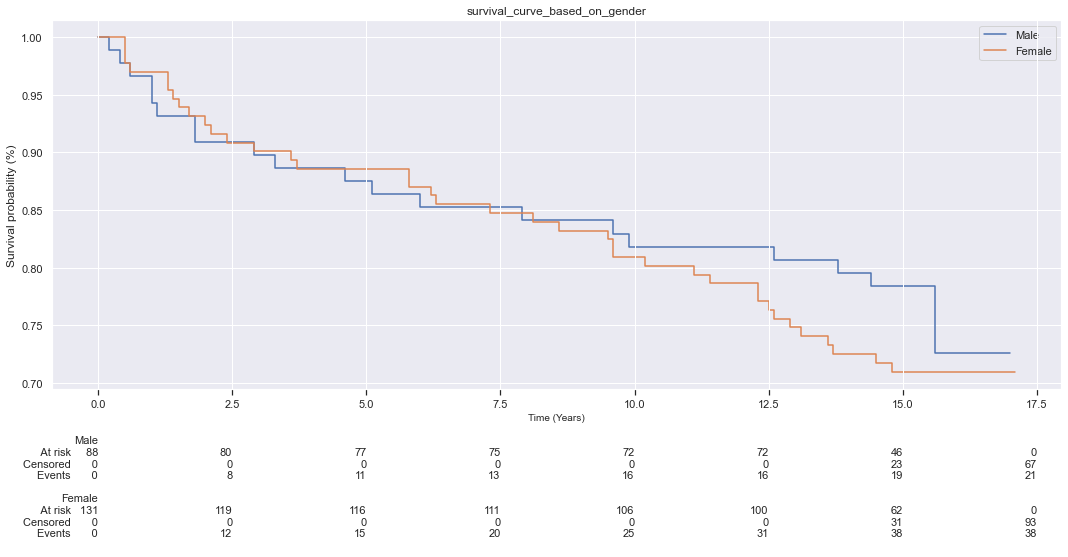

In [469]:
# z = np.array([1,0,1,0,1])
# colors = np.array(["red", "red"]) c=colors[z]
ax = plt.subplot(111)
kmf_m.plot_survival_function(ax=ax,ci_show=False)
kmf_f.plot_survival_function(ax=ax,ci_show=False)



from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_m, kmf_f, ax=ax)
plt.title('survival_curve_based_on_gender')
ax.set_ylabel('Survival probability (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

In [505]:
# kmf_m.confidence_interval_
# kmf_f.confidence_interval_
# kmf_bmi_above_40.confidence_interval_
# kmf_bmi_below_40.confidence_interval_
# kmf_age_above_65.confidence_interval_
# kmf_age_below_65.confidence_interval_
# kmf.confidence_interval_


In [515]:
confidence_table = kmf_m.confidence_interval_

In [518]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.00,1.00,1.00
0.20,0.97,1.00
0.40,0.96,1.00
0.50,0.95,0.99
0.60,0.93,0.98
1.00,0.92,0.98
1.10,0.92,0.98
1.30,0.91,0.97
1.40,0.90,0.97
1.50,0.89,0.96


In [519]:
confidence_table[['Female_lower_0.95', 'Female_upper_0.95']] = kmf_f.confidence_interval_
confidence_table[['BMI > 40_lower_0.95', 'BMI > 40_upper_0.95']] = kmf_bmi_above_40.confidence_interval_
confidence_table[['BMI < 40_lower_0.95', 'BMI < 40_upper_0.95']] = kmf_bmi_below_40.confidence_interval_
confidence_table[['Age > 65_lower_0.95', 'Age > 65_upper_0.95']] = kmf_age_above_65.confidence_interval_
confidence_table[['Age < 65_lower_0.95', 'Age < 65_upper_0.95']] = kmf_age_below_65.confidence_interval_
confidence_table[['all_patients_lower_0.95', 'all_patients_upper_0.95']]  = kmf.confidence_interval_

In [521]:
confidence_table.to_csv('confidence_interval.csv')


Notice that the probability of a **male** surviving is higher than the probability of a **female**  from **9.6 Years(9 years and 6 months)**. So from this data, we can say that the medical researchers should focus more on the factors that lead to poor survival rates for female patients after **9.6 Years**.

#### Cumulitive_density

It gives us a probability of a person dying at a certain timeline.

In [476]:
cumulative_density_df = pd.DataFrame()
cumulative_density_df['Female'] = kmf_f.cumulative_density_['Female']
cumulative_density_df['Male'] = kmf_m.cumulative_density_['Male']

In [477]:
# cumulative_density_df

### Plot of  Probability of a person dying at a certain timeline based on Gender

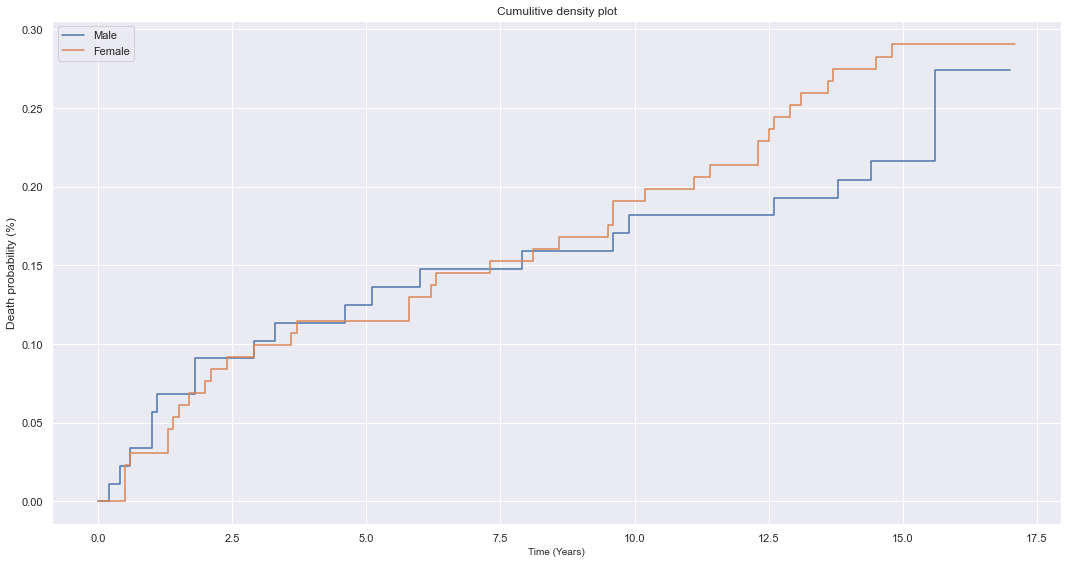

In [478]:
# z = np.array([1,0,1,0,1])
# colors = np.array(["red", "red"]) c=colors[z]
ax = plt.subplot(111)
kmf_m.plot_cumulative_density(ax=ax,ci_show=False)
kmf_f.plot_cumulative_density(ax=ax,ci_show=False)


plt.title('Cumulitive density plot')
ax.set_ylabel('Death probability (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

#### Log-Rank Test For Gender


Goal: Here, our goal is to see if there is any significant difference between the groups being compared.

**Null Hypothesis**: The null hypothesis states that there is no significant difference between the groups being studied. If there is a significant difference between these groups, then we have to reject our null hypothesis.

**Less than (5% = 0.05) P-value** means that there is a significant difference between the groups that we compared. We can partition our groups based on their sex, age, race, method of treatment, etc.

**It’s a test to find out the value of P.**

In [479]:
T = Male['Time Years']
E = Male['Revision all cause']
T1 = Female['Time Years']
E1 = Female['Revision all cause']

In [480]:
from lifelines.statistics import logrank_test
results = logrank_test(T,T1, event_observed_A = E, event_observed_B= E1)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.60 0.44      1.19

Here notice that for our **Gender** groups, the test_statistic equals 0.60, and the P-value indicates (<0.44), which is not statistically significant and denotes that we have to accept our null hypothesis and admit that the survival function for both Genders is not significantly different. The P-value gives us strong evidence that “sex” was not associated with survival years. In short, we can say that in our example, “sex” has no major contribution to survival years.

#### Age Greater and less than 65

In [481]:
kmf_age_above_65 = KaplanMeierFitter()
kmf_age_below_65 = KaplanMeierFitter()

In [482]:
# Divide data into groups
Age_greater_65 = df.query("Age > 65")
Age_less_65 = df.query("Age < 65")

In [483]:
# Fit data into our objects
kmf_age_above_65.fit(durations = Age_greater_65['Time Years'], event_observed = Age_greater_65['Revision all cause'], label = 'Age > 65')
kmf_age_below_65.fit(durations = Age_less_65['Time Years'], event_observed = Age_less_65['Revision all cause'], label = 'Age < 65')

<lifelines.KaplanMeierFitter:"Age < 65", fitted with 150 total observations, 110 right-censored observations>

### Plot of Survival Probability Curve By Age Group

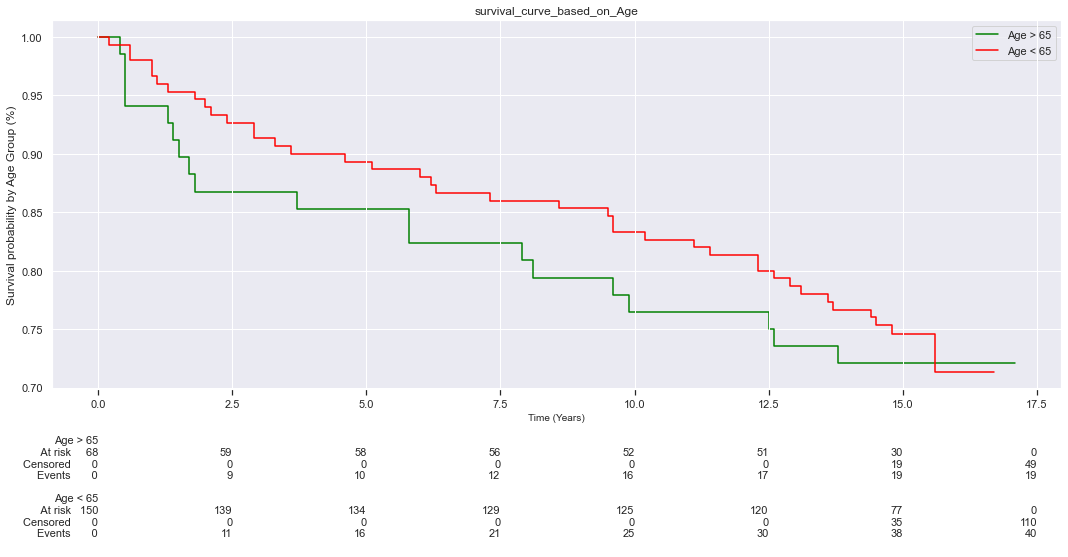

In [484]:
ax = plt.subplot(111)
kmf_age_above_65.plot_survival_function(ax=ax,ci_show=False, c='green')
kmf_age_below_65.plot_survival_function(ax=ax,ci_show=False, c='red')



from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_age_above_65, kmf_age_below_65, ax=ax)
plt.title('survival_curve_based_on_Age')
ax.set_ylabel('Survival probability by Age Group (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

Notice that the probability of surviving for Age less than **65**  is higher than the probability surviving for people with age greater than 65. So from this data, we can say that the medical researchers should focus more on the factors that lead to poor survival rates for Age greater than 65.

### Plot of  Probability of a person dying at a certain timeline based on Age range (> 65 and and < 65)

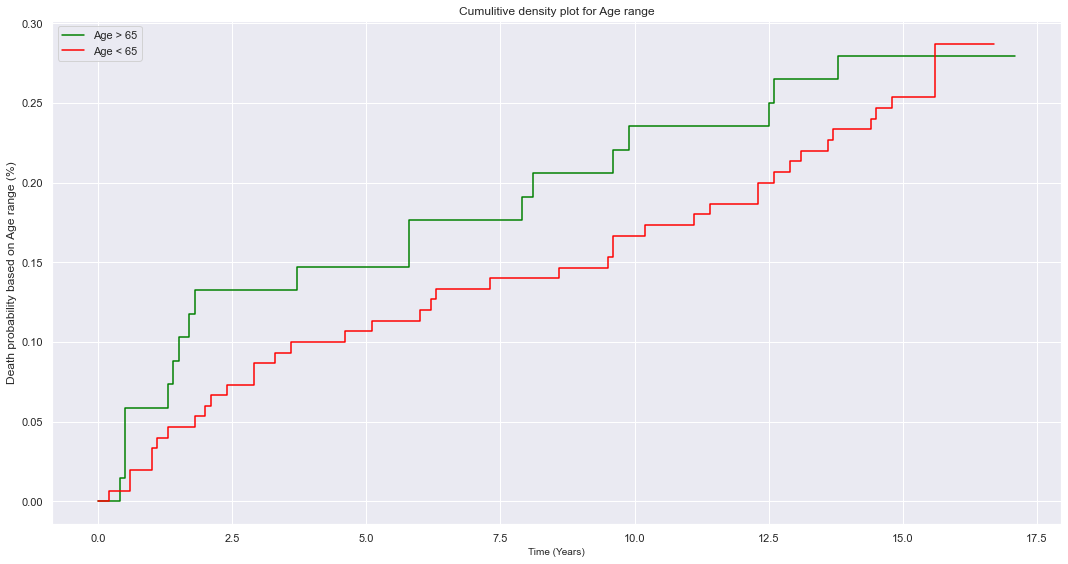

In [485]:
# z = np.array([1,0,1,0,1])
# colors = np.array(["red", "red"]) c=colors[z]
ax = plt.subplot(111)
kmf_age_above_65.plot_cumulative_density(ax=ax,ci_show=False, c='green')
kmf_age_below_65.plot_cumulative_density(ax=ax,ci_show=False, c= 'red')


plt.title('Cumulitive density plot for Age range')
ax.set_ylabel('Death probability based on Age range (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

Patients with age greater than 65 have higher probability of dying, Another area medical researchers has to look into.

#### Log-Rank Test For Age Range (> or < 65 years)

In [486]:
T = Age_greater_65['Time Years']
E = Age_greater_65['Revision all cause']
T1 = Age_less_65['Time Years']
E1 = Age_less_65['Revision all cause']

In [487]:
from lifelines.statistics import logrank_test
results = logrank_test(T,T1, event_observed_A = E, event_observed_B= E1)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.14 0.71      0.49

Here notice that for our Age groups, the test_statistic equals **0.14**, and the P-value indicates **(<0.71)**, which is not statistically significant and denotes that we have to accept our null hypothesis and admit that the survival function for both Age Range is not significantly different. The P-value gives us strong evidence that “Age Range” was not associated with survival years. In short, we can say that in our example, “Age Range” has no major contribution to survival years.

#### BMI greater and less than 40

In [488]:
kmf_bmi_above_40 = KaplanMeierFitter()
kmf_bmi_below_40 = KaplanMeierFitter()

In [489]:
# Divide data into groups
Bmi_greater_40 = df.query("BMI > 40")
Bmi_less_40 = df.query("BMI < 40")

In [490]:
# Fit data into our objects
kmf_bmi_above_40.fit(durations = Bmi_greater_40['Time Years'], event_observed = Bmi_greater_40['Revision all cause'], label = 'BMI > 40')
kmf_bmi_below_40.fit(durations = Bmi_less_40['Time Years'], event_observed = Bmi_less_40['Revision all cause'], label = 'BMI < 40')

<lifelines.KaplanMeierFitter:"BMI < 40", fitted with 191 total observations, 141 right-censored observations>

### Plot of Survival Probability Curve By BMI  Range

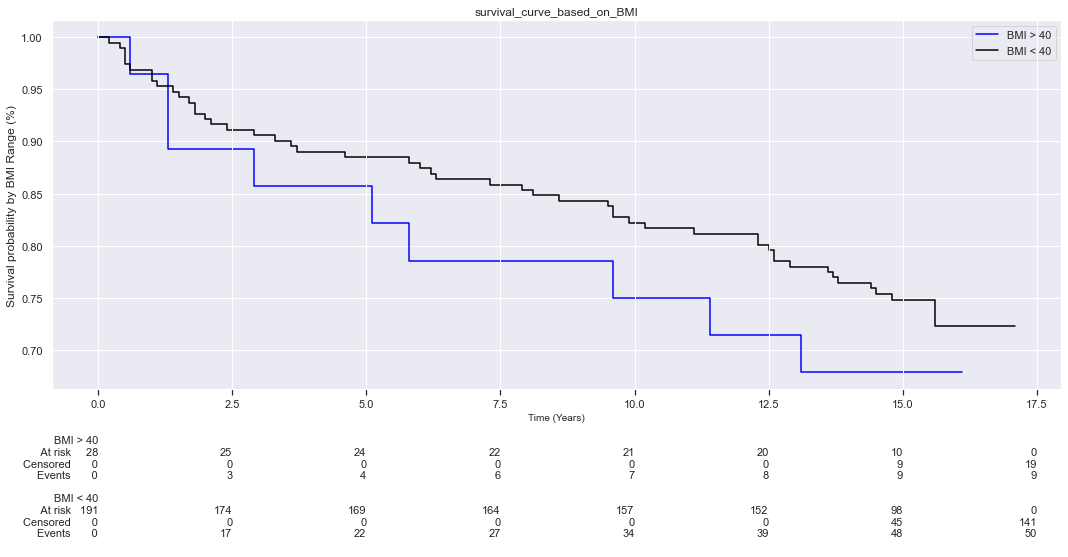

In [491]:
ax = plt.subplot(111)
kmf_bmi_above_40.plot_survival_function(ax=ax,ci_show=False, c='blue')
kmf_bmi_below_40.plot_survival_function(ax=ax,ci_show=False, c='black')



from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_bmi_above_40, kmf_bmi_below_40, ax=ax)
plt.title('survival_curve_based_on_BMI')
ax.set_ylabel('Survival probability by BMI Range (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

Notice that the probability of surviving for BMI  less than 40 is higher than the probability surviving for people with BMI greater than 40. So from this data, we can say that the medical researchers should focus more on the factors that lead to poor survival rates for BMI  greater than 40.

#### Plot of Probability of a person dying at a certain timeline based on BMI  range (> 40 and and < 40)

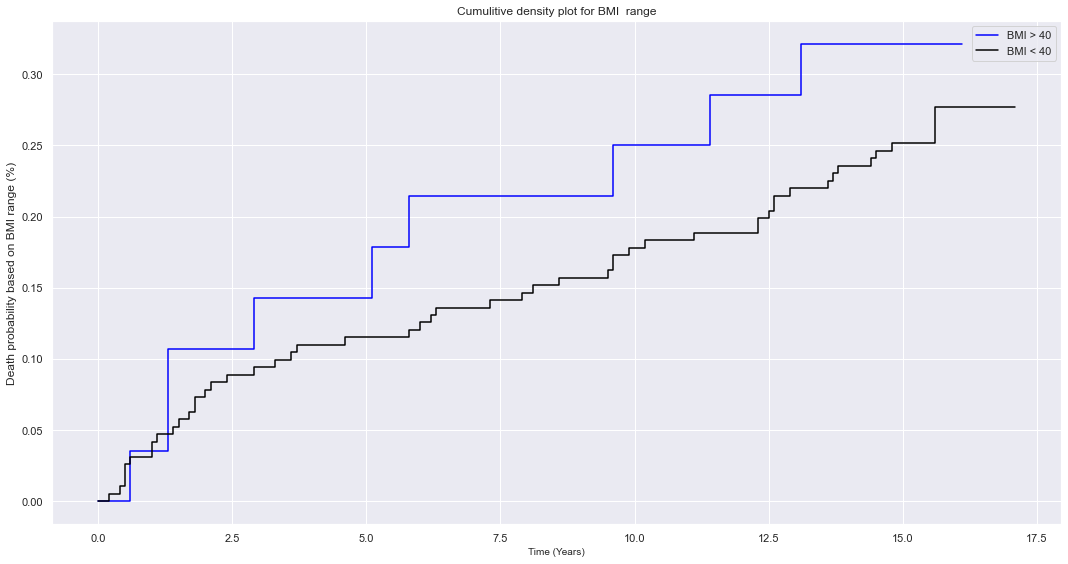

In [492]:
# z = np.array([1,0,1,0,1])
# colors = np.array(["red", "red"]) c=colors[z]
ax = plt.subplot(111)
kmf_bmi_above_40.plot_cumulative_density(ax=ax,ci_show=False, c='blue')
kmf_bmi_below_40.plot_cumulative_density(ax=ax,ci_show=False, c= 'black')


plt.title('Cumulitive density plot for BMI  range')
ax.set_ylabel('Death probability based on BMI range (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

#### Log-Rank Test For BMI  Range (> or < 40)

In [493]:
T = Bmi_greater_40['Time Years']
E = Bmi_greater_40['Revision all cause']
T1 = Bmi_less_40['Time Years']
E1 = Bmi_less_40['Revision all cause']

In [494]:
results = logrank_test(T,T1, event_observed_A = E, event_observed_B= E1)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.60 0.44      1.19

Here notice that for our BMI  range, the test_statistic equals 0.60, and the P-value indicates (<0.44), which is not statistically significant and denotes that we have to accept our null hypothesis and admit that the survival function for both BMI range is not significantly different. 

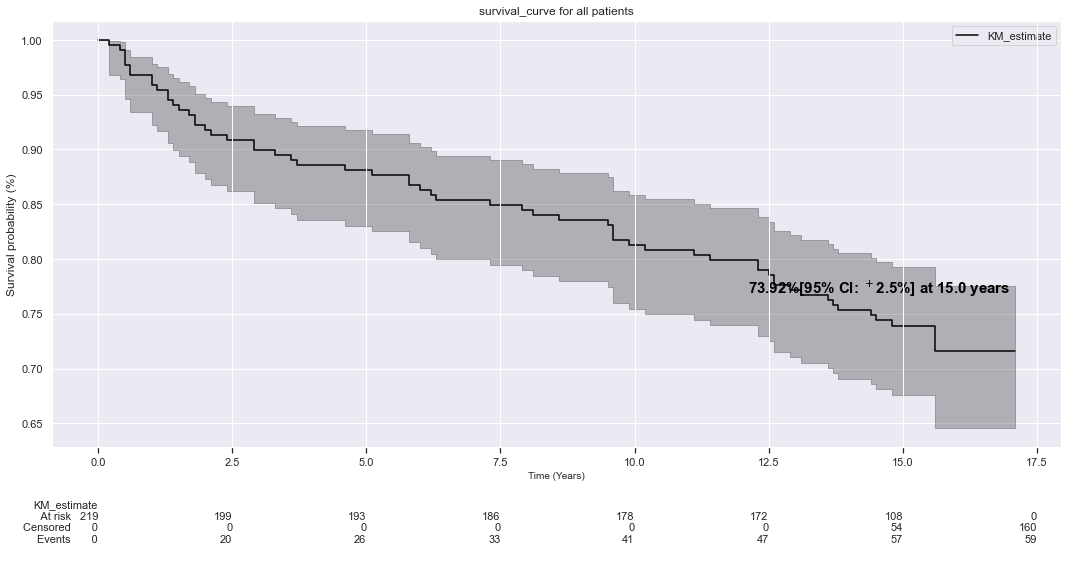

In [495]:
ax = plt.subplot(111)
z = np.array([1,0,1,0,1])
colors = np.array(["red", "black"])
kmf = KaplanMeierFitter()

x = kmf.fit(df['Time Years'], df['Revision all cause']).plot_survival_function(ax=ax, c=colors[z])
surviival_table = kmf.survival_function_.reset_index().rename(columns = {'timeline':'Survival time','Kaplan Meier survival curve':'Survival Proportion'})
surviival_table = surviival_table[surviival_table['Survival time'] <= 15.00]
years = surviival_table.tail()[-1:].values[0][0]
percentage = surviival_table.tail()[-1:].values[0][1]*100
ax.text(0.95, 0.35,str('{0}%[95% CI: $^+$2.5%] at {1} years'.format(round((percentage),2),round((years),2))), verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes,
        color = 'black', fontsize = 15,weight='bold')

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf, ax=ax)

plt.title('survival_curve for all patients')
ax.set_ylabel('Survival probability (%)')
ax.set_xlabel('Time (Years)', size = 10)
plt.tight_layout()

In [496]:
patient_table = pd.DataFrame()

In [409]:
patient_table['Survival in each time period (%)']  = kmf.survival_function_['KM_estimate']
patient_table['Failure rate'] = kmf.cumulative_density_
# patient_table[['confidence_interval_lower_0.95', 'confidence_interval_upper_0.95' ]] = kmf.confidence_interval_
patient_table[['removed', 'observed', 'censored', 'entrance', 'Number at risk']] = kmf.event_table

In [410]:
patient_table.to_csv('life analysis table.csv')


In [411]:
import dataframe_image as dfi


In [412]:
dfi.export(patient_table, 'Life analysis of entire study group.png')



### Cox proportional hazard model

The Cox proportional hazard model is basically a regression model generally used by medical researchers to find out the relationship between the survival time of a subject and one or more predictor variables. In short, we want to find out how different parameters like age, sex, bmi, height affects the length of survival for a subject.

#### Why do we need it?

In medical research, generally, we are considering more than one factor to diagnose a person’s health or survival time, i.e., we generally make use of their sex,  age, bmi, and F/U Status, to find out if there is any significant difference between those in different groups.

For example, if we are grouping our data based on a person’s age, then our goal will be to find out which age group has a higher survival chance. Is that the children’s group, adult’s group, or old person’s group?

In [413]:
kmf = KaplanMeierFitter()
kmf.fit(durations = df['Time Years'], event_observed=df['Revision all cause'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 219 total observations, 160 right-censored observations>

In [414]:
len(df['Reason Fail'].unique())

11

In [415]:
from lifelines import CoxPHFitter

In [416]:
df['Reason for Revision']=pd.factorize(df['Reason Fail'].tolist())[0]
df['Status']=pd.factorize(df['F/U Status'].tolist())[0]

In [417]:
df.head()

,Time Years,F/U Status,Gn,Age,BMI,Reoperations,Reason Fail,Revision all cause,FU (y),ROM,∆ROM,KSPain,∆KSP,KSTotal,∆KST,KSFnc,∆KSF,XR FU (y),Gender,Reason for Revision,Status
0,2.10,failed,F,54.50,33.30,revision UKA to TKA 5/15/2007,aseptic loosening,1,5.50,125,5.00,20,20.00,70,21.00,55,5.00,3.00,0,0,0
1,2.00,failed,F,55.60,28.00,Arthroscopy 12/13/2005; revision UKA to TKA 3/...,aseptic loosening,1,15.20,100,-10.00,45,35.00,90,35.00,60,-10.00,11.30,0,0,0
2,1.30,failed,F,41.60,40.90,revision 9/11/07,aseptic loosening,1,15.00,135,20.00,45,0.00,95,22.00,100,60.00,13.30,0,0,0
3,2.40,failed,F,43.70,32.00,revision UKA to TKA 8/19/2008,medial tibial overload,1,10.20,105,-5.00,50,50.00,94,67.00,40,5.00,2.50,0,1,0
4,9.60,failed,F,55.80,28.30,revision UKA to TKA 12/2/2015,tibial collapse,1,15.40,120,0.00,45,35.00,94,55.00,80,10.00,11.70,0,2,0


In [418]:
df.columns

Index(['Time Years', 'F/U Status', 'Gn', 'Age', 'BMI', 'Reoperations',
       'Reason Fail', 'Revision all cause', 'FU (y)', 'ROM', '∆ROM', 'KSPain',
       '∆KSP', 'KSTotal', '∆KST', 'KSFnc', '∆KSF', 'XR FU (y)', 'Gender',
       'Reason for Revision', 'Status'],
      dtype='object')

In [419]:
df2 = df[['Time Years','Age','BMI','Revision all cause', 'Gender', 'Reason for Revision', 'Status',
         'FU (y)', 'ROM', '∆ROM', 'KSPain', '∆KSP', 'KSTotal', '∆KST', 'KSFnc', '∆KSF', 'XR FU (y)']]

In [420]:
cph = CoxPHFitter()
cph.fit(df2.dropna(), 'Time Years', event_col='Revision all cause' )
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 219 total observations, 160 right-censored observations>
             duration col = 'Time Years'
                event col = 'Revision all cause'
      baseline estimation = breslow
   number of observations = 219
number of events observed = 59
   partial log-likelihood = -169.95
         time fit was run = 2022-04-16 14:29:26 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
Age                   0.03       1.03       0.02            -0.00             0.07                 1.00                 1.07
BMI                  -0.04       0.96       0.03            -0.10             0.02                 0.90                 1.02
Gender                0.19       1.21       0.36            -0.51             0.89                 0.60                 2.44
Reason for Revision  -0.31       0.73       0.08            -0.47            -0.15                 0.62                 0.86
Status               -1.21       0.30       0.28            -1.76            -0.65                 0.17                 0.52
FU (y)               -0.31       0.73       0.06            -0.42            -0.20                 0.66                 0.82
ROM                  -0.03       0.97       0.02            -0.07             0.01                 0.93                 1.01
∆ROM                 -0.01       0.99       0.02            -0.05             0.03                 0.95                 1.03
KSPain                0.01       1.01       0.03            -0.04             0.07                 0.96                 1.07
∆KSP                 -0.03       0.97       0.02            -0.07             0.01                 0.93                 1.01
KSTotal               0.02       1.02       0.02            -0.01             0.06                 0.99                 1.06
∆KST                  0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
KSFnc                -0.01       0.99       0.01            -0.04             0.01                 0.96                 1.01
∆KSF                  0.02       1.02       0.01            -0.01             0.04                 0.99                 1.05
XR FU (y)            -0.03       0.97       0.05            -0.12             0.06                 0.89                 1.06

                      cmp to     z      p   -log2(p)
covariate                                           
Age                     0.00  1.87   0.06       4.01
BMI                     0.00 -1.22   0.22       2.18
Gender                  0.00  0.53   0.60       0.74
Reason for Revision     0.00 -3.75 <0.005      12.47
Status                  0.00 -4.27 <0.005      15.62
FU (y)                  0.00 -5.45 <0.005      24.21
ROM                     0.00 -1.37   0.17       2.56
∆ROM                    0.00 -0.54   0.59       0.77
KSPain                  0.00  0.49   0.62       0.68
∆KSP                    0.00 -1.48   0.14       2.85
KSTotal                 0.00  1.19   0.23       2.11
∆KST                    0.00  1.00   0.32       1.65
KSFnc                   0.00 -1.07   0.28       1.82
∆KSF                    0.00  1.48   0.14       2.85
XR FU (y)               0.00 -0.69   0.49       1.02
---
Concordance = 0.96
Partial AIC = 369.90
log-likelihood ratio test = 274.82 on 15 df
-log2(p) of ll-ratio test = 162.87

In [421]:
# dfi.export(cph.print_summary(), 'Cox proportional hazard model.png')

Here notice the p-value of different parameters as we know that a p-value (<0.05) is considered significant. Here you can see that the p-value of **Reason for Revision**, **Status**, and **FU (y)** are <0.05.

The p-value for **Reason for Revision** is <0.005 and HR (Hazard Ratio) is  0.73 indicating a strong relationship between the patients’ Reason for Revision and decreased risk of death.

The p-value for **FU (y)** is <0.005 and HR (Hazard Ratio) is  0.30 indicating a strong relationship between the patients’ Status and decreased risk of death

The p-value for **Status** is <0.005 and HR (Hazard Ratio) is  0.73 indicating a strong relationship between the patients’ Status and decreased risk of death

<!-- Now notice that HR for Age is 1.04, which suggests only a 4% increase for the higher age group. So we can say that there is no significant difference between different age groups. -->


#### Lets Check which factor affects **Revision all cause** the most from the graph:

<AxesSubplot:xlabel='log(HR) (95% CI)'>

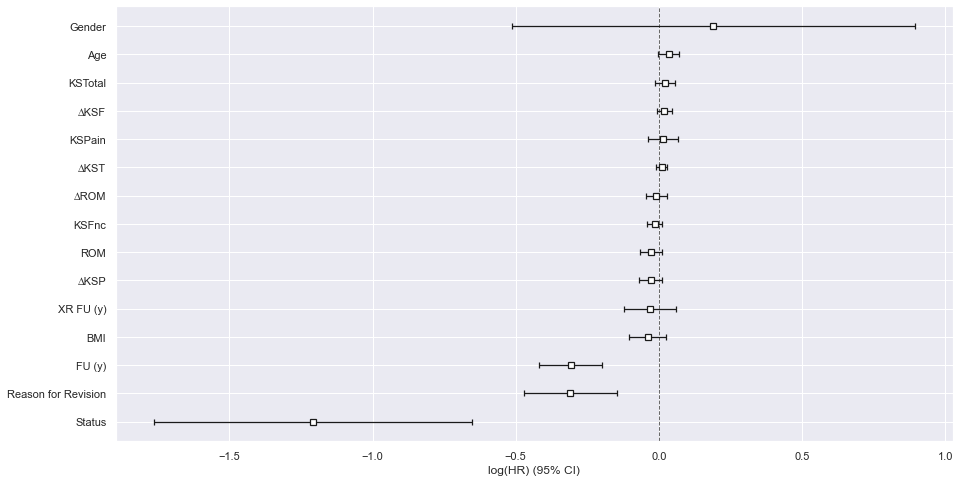

In [422]:
cph.plot()

You can clearly see that **F/U Status** and **FU(y)**  variable have significant differences.

In [423]:
import scipy.stats as stats

###  Paired t-test

In [424]:
col1 = ['FU (y)', 'ROM', 'KSPain', 'KSTotal','KSFnc']

col2 = ['XR FU (y)', '∆ROM', '∆KSP', '∆KST', '∆KSF' ]

pair_test = {}

for i in zip(col1,col2):
    test = stats.ttest_rel(df[i[0]], df[i[1]])
    pair_test[f'{i[0]} vs {i[1]}'] = test

In [425]:
pair_test

{'FU (y) vs XR FU (y)': Ttest_relResult(statistic=19.459513151382584, pvalue=1.4666956192377899e-49),
 'ROM vs ∆ROM': Ttest_relResult(statistic=216.0121185779571, pvalue=3.076790129673387e-256),
 'KSPain vs ∆KSP': Ttest_relResult(statistic=19.151375597544504, pvalue=1.3252761541827914e-48),
 'KSTotal vs ∆KST': Ttest_relResult(statistic=39.00453878491541, pvalue=2.82147957247874e-100),
 'KSFnc vs ∆KSF': Ttest_relResult(statistic=53.423555922361615, pvalue=3.2338207043012303e-127)}

In [426]:
pair_test_df = pd.DataFrame.from_records([(statistic,pvalue) for statistic, pvalue in pair_test.values()], columns=['statistic','pvalue'])

In [427]:
pair_test_df = pd.DataFrame(pair_test).T.rename(columns={0: 'statistic',1:'pvalue'})

In [428]:
pvalue = [pvalue for statistics, pvalue in  pair_test.values()]

In [429]:
pair_test_df

,statistic,pvalue
FU (y) vs XR FU (y),19.46,0.00
ROM vs ∆ROM,216.01,0.00
KSPain vs ∆KSP,19.15,0.00
KSTotal vs ∆KST,39.00,0.00
KSFnc vs ∆KSF,53.42,0.00


In [430]:
pvalue

[1.4666956192377899e-49,
 3.076790129673387e-256,
 1.3252761541827914e-48,
 2.82147957247874e-100,
 3.2338207043012303e-127]

#### Plot Survival probabilities of first 10 persons in our dataset

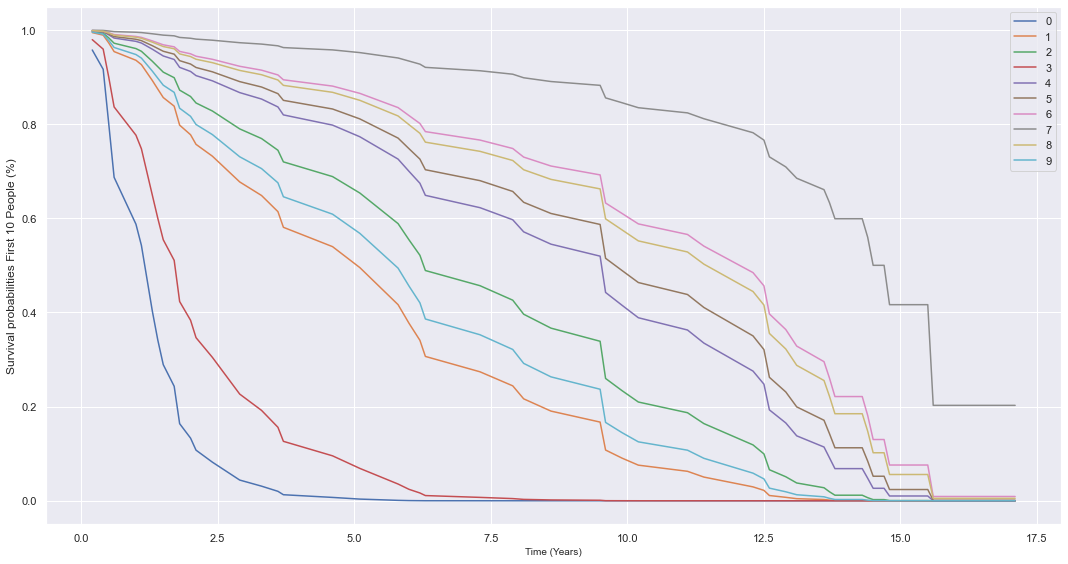

In [431]:
d_data = df2.iloc[0:10,:]
cph.predict_survival_function(d_data).plot();
plt.ylabel('Survival probabilities First 10 People (%)')
plt.xlabel('Time (Years)', size = 10)
plt.tight_layout();

**Lets compare the different types of Reason for Revision in the dataset:**

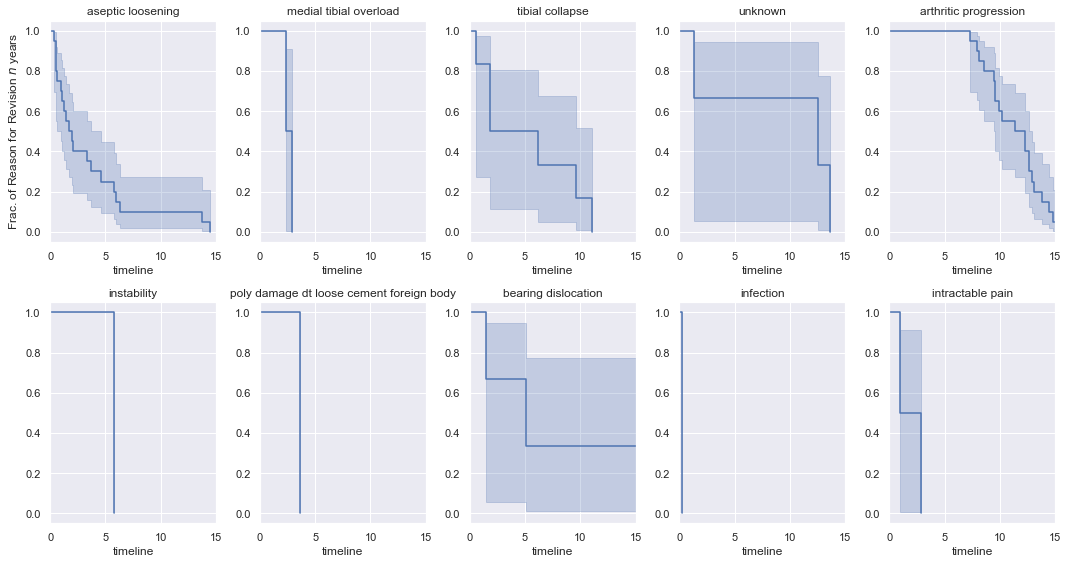

In [432]:
df2 = df[df['Revision all cause']==1]
reason_types = df2['Reason Fail'].unique()
T = df2["Time Years"]
E = df2["Revision all cause"]
kmf = KaplanMeierFitter()

for i, reason_type in enumerate(reason_types):
    ax = plt.subplot(2, 5, i + 1)

    ix = df['Reason Fail'] == reason_type
    kmf.fit(T[ix], E[ix])
    kmf.plot_survival_function(ax=ax, legend=False)

    plt.title(reason_type)
    plt.xlim(0, 15)

    if i==0:
        plt.ylabel('Frac. of Reason for Revision $n$ years')
        

plt.tight_layout()

## 3.Reason for failure

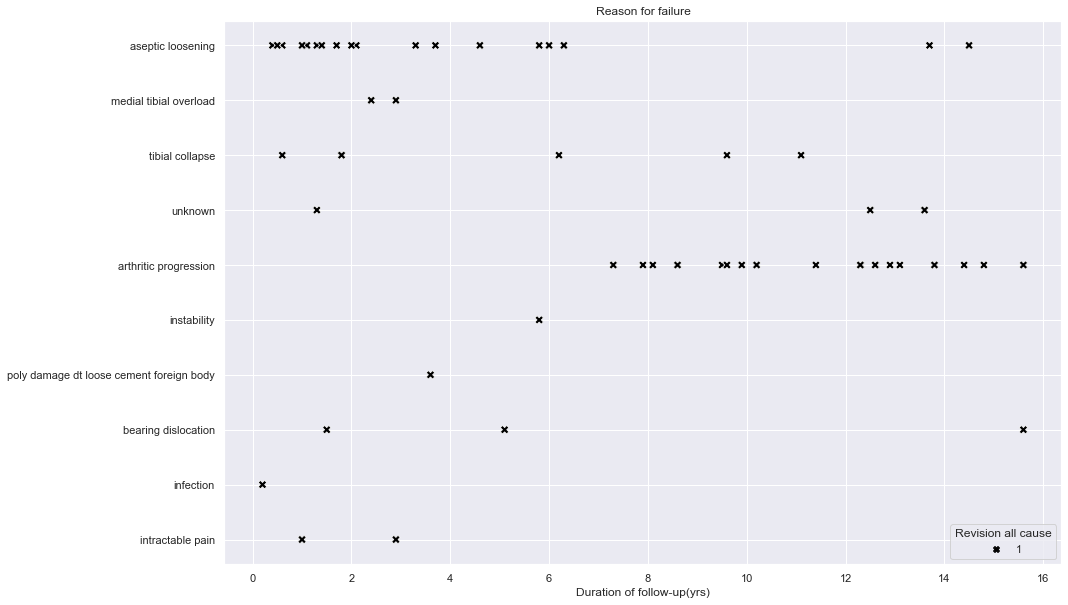

In [433]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,10
_, ax = plt.subplots(1, 1)

g1 = sns.scatterplot(data=df2, y="Reason Fail", x="Time Years", hue="Revision all cause", style="Revision all cause",palette=["black"], markers='X',s=70)
g1.set(title='Reason for failure');
g1.set(xlabel='Duration of follow-up(yrs)');
g1.set(ylabel=None);

## 4.Create a patient table

In [434]:
df.head()

,Time Years,F/U Status,Gn,Age,BMI,Reoperations,Reason Fail,Revision all cause,FU (y),ROM,∆ROM,KSPain,∆KSP,KSTotal,∆KST,KSFnc,∆KSF,XR FU (y),Gender,Reason for Revision,Status
0,2.10,failed,F,54.50,33.30,revision UKA to TKA 5/15/2007,aseptic loosening,1,5.50,125,5.00,20,20.00,70,21.00,55,5.00,3.00,0,0,0
1,2.00,failed,F,55.60,28.00,Arthroscopy 12/13/2005; revision UKA to TKA 3/...,aseptic loosening,1,15.20,100,-10.00,45,35.00,90,35.00,60,-10.00,11.30,0,0,0
2,1.30,failed,F,41.60,40.90,revision 9/11/07,aseptic loosening,1,15.00,135,20.00,45,0.00,95,22.00,100,60.00,13.30,0,0,0
3,2.40,failed,F,43.70,32.00,revision UKA to TKA 8/19/2008,medial tibial overload,1,10.20,105,-5.00,50,50.00,94,67.00,40,5.00,2.50,0,1,0
4,9.60,failed,F,55.80,28.30,revision UKA to TKA 12/2/2015,tibial collapse,1,15.40,120,0.00,45,35.00,94,55.00,80,10.00,11.70,0,2,0


In [438]:
final = df.groupby(['Reoperations','Reason Fail'],as_index=False)[['Reoperations','Time Years',]].mean()

In [439]:
final.rename(columns={'Reason Fail': 'Reason for Revision'},inplace=True)

basically we go through each patient that needed a revision and report the time they had it, why they had it.

In [440]:
# Import seaborn library
import seaborn as sns
 
# Declaring the cm variable by the
# color palette from seaborn
cm = sns.light_palette("green", as_cmap=True)
 
# Visualizing the DataFrame with set precision
final.style.background_gradient(cmap=cm).set_precision(2)

,Reoperations,Reason for Revision,Time Years
0,0,0,15.45
1,Arthroscopy 12/13/2005; revision UKA to TKA 3/28/2007,aseptic loosening,2.00
2,"Arthroscopy, removal of loose body and lateral menisectomy 4/9/07; revision d/t loosening 5/17/12",aseptic loosening,6.00
3,I&D hematoma 4/20/05; radical 6/14/05; reimp 8/25/05,infection,0.20
4,UKA to TKA done in Michigan 2019,arthritic progression,13.80
5,arthroscopy & arthrotomy w poly change dt cement removal 10/14/08,poly damage dt loose cement foreign body,3.60
6,arthroscopy 3/22/11 Dr. Flanigan; revision UKA to TKA Dr. Glassman OSU,arthritic progression,7.30
7,arthroscopy w/ synovectomy 3/13/06; revision UKA to TKA d/t DJD progression 12/5/14,arthritic progression,9.50
8,lateral UKA added 7/25/2017 dt arthritic progression,arthritic progression,12.30
9,lysis of adhesions / AIR (29884) and lateral menisectomy (29881) 5/13/2014; revision UKA to TKA 6/30/2014,arthritic progression,8.60


In [ ]:
dfi.export(final, 'patient table.png')